In [40]:
import numpy as np
from prettytable import PrettyTable

T=11
states_range = [-10,11]
action_range = [0,10]
random_demand = [0,10]
to_add = 10
p=4
a,b=5,5

def h(X):
    if X >= 0:
        return a * X
    else:
        return -b * X

def check(state):
    return state>=states_range[0] and state<states_range[1]

def cost(X,U):
    return h(X)+p*U

V=np.zeros((T+2,states_range[1]-states_range[0]))

Demand = [np.random.randint(random_demand[0], random_demand[1]) for _ in range(T + 10)]

for _ in range(100000):

    for s in range(states_range[0], states_range[1]):
       V[T][s + to_add] = h(s)

    for t in range(T-1,-1,-1):
        for X in range(states_range[0],states_range[1]):
            min_cost = float('inf')
            temp_cost = 0
            cnt=0
            for U in range(action_range[0],action_range[1]):
                # next_state = X+U-np.random.randint(random_demand[0],random_demand[1])
                next_state = X+U-Demand[t]
                if(check(next_state)):
                    temp_cost += cost(next_state,U)+V[t+1][next_state + to_add]
                    cnt+=1
            if(cnt>0):
                temp_cost/=cnt
                if temp_cost<min_cost:
                    min_cost = temp_cost
                V[t][X+to_add] = min_cost

# Print Policy from V
policy = np.zeros((T + 1,states_range[1]-states_range[0] + 1))
for t in range(T + 1):
    for X in range(states_range[0],states_range[1] + 1):
        min_cost = float('inf')
        for U in range(action_range[0],action_range[1] + 1):
            # next_state = X+U-np.random.randint(random_demand[0],random_demand[1])
            next_state = X+U-Demand[t]
            # next_state = X+U
            if(check(next_state)):
                temp_cost = cost(next_state,U)+V[t+1][next_state+to_add]
                if temp_cost<min_cost:
                    min_cost = temp_cost
                    policy[t][X+to_add] = U

In [41]:
table = PrettyTable()

col_labels = list(range(states_range[0],states_range[1] + 1))

table.field_names = [""] + col_labels

row_labels = list( range(T) )
print(row_labels)
print(len(policy[0]))
for i in range(len(row_labels)):
    tmp = policy[i].tolist()
    tmp = [int(x) for x in tmp]
    to_insert = [row_labels[i]] + tmp
    table.add_row(to_insert)

# Print the table
print(table)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
22
+----+-----+----+----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+----+----+
|    | -10 | -9 | -8 | -7 | -6 | -5 | -4 | -3 | -2 | -1 | 0  | 1  | 2 | 3 | 4 | 5 | 6 | 7 | 8 | 9 | 10 | 11 |
+----+-----+----+----+----+----+----+----+----+----+----+----+----+---+---+---+---+---+---+---+---+----+----+
| 0  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0  | 0  |
| 1  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1  | 0  |
| 2  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0  | 0  |
| 3  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9 | 8 | 7 | 6 | 5 | 4 | 3 | 2 | 1  | 0  |
| 4  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7 | 6 | 5 | 4 | 3 | 2 | 1 | 0 | 0  | 0  |
| 5  |  10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 10 | 9  | 8  | 7 | 6 | 5 | 4 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301315829872, 345.53187199307285, 281.37541238711935, 237.5551042280801, 195.65117019400356, 155.05853174603175, 99.7, 43.0]
[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301315829872, 345.53187199307285, 281.37541238711935, 237.5551042280801, 195.65117019400356, 155.05853174603175, 99.7, 43.0]
[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301315829872, 345.53187199307285, 281.37541238711935, 237.5551042280801, 195.65117019400356, 155.05853174603175, 99.7, 43.0]
[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301315829872, 345.53187199307285, 281.37541238711935, 237.5551042280801, 195.65117019400356, 155.05853174603175, 99.7, 43.0]
[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301315829872, 345.53187199307285, 281.37541238711935, 237.5551042280801, 195.65117019400356, 155.05853174603175, 99.7, 43.0]
[733.607657947637, 633.6027028213736, 517.9845474442186, 409.6301

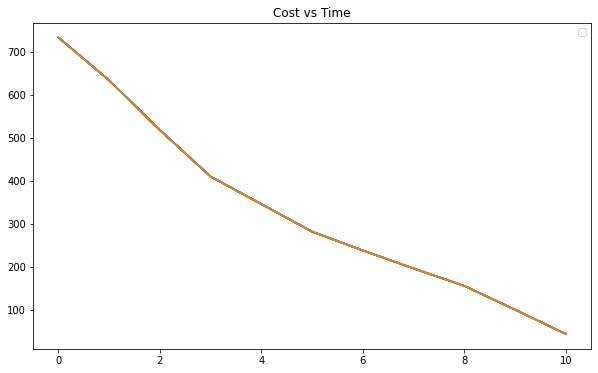

In [42]:
import matplotlib.pyplot as plt
curr = states_range[0]+1
t=0
costs = []
plt.figure(figsize=(10, 6))  # 10 inches in width and 6 inches in height
for start_state in range(states_range[0],states_range[1]):
    curr = start_state
    while(t<T):
        # print("At time ",t," we have ",curr," units of inventory. We order ",int(policy[t][curr+to_add])," units.")
        # next_state = curr+int(policy[t][curr+to_add])-np.random.randint(random_demand[0],random_demand[1])
        next_state = curr+int(policy[t][curr+to_add])-Demand[t]
        cost = h(next_state)+p*int(policy[t][curr+to_add])
        costs.append(V[t][curr+to_add])
        curr=next_state
        t+=1
    # plt.xlabel('Time')
    # plt.ylabel('Cost')
    plt.plot(range(0,T),costs)
    print(costs)

plt.legend()
plt.plot(range(0,T),costs)
plt.title('Cost vs Time')

plt.show()

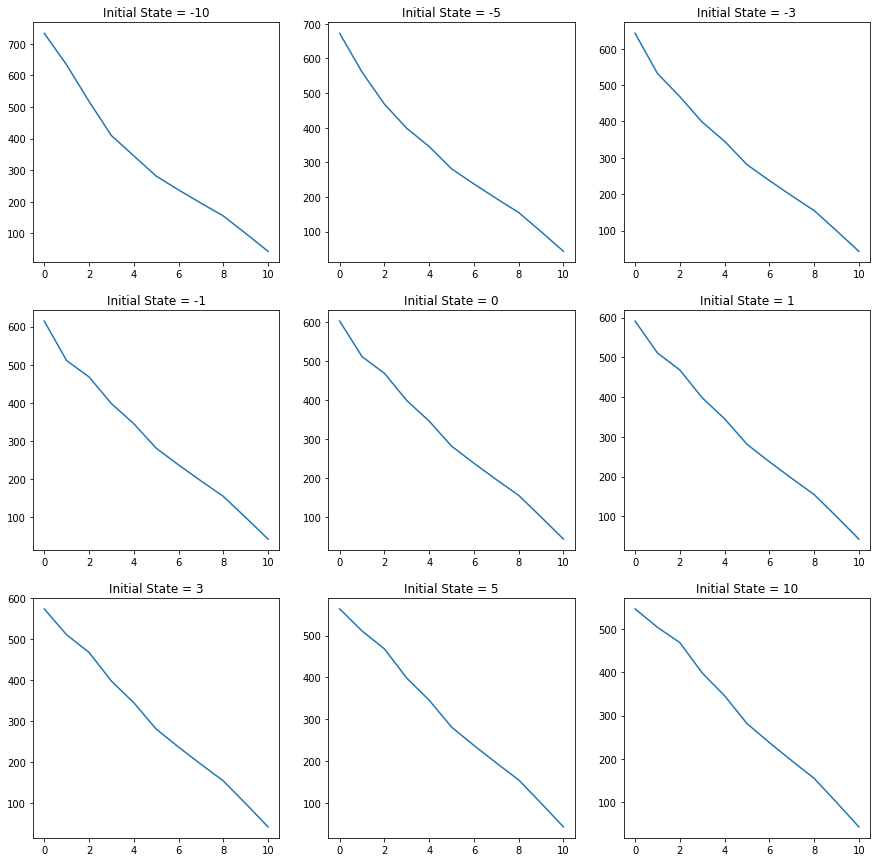

In [43]:
states = [-10, -5, -3 , -1, 0, 1, 3, 5, 10]
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
ptr = 0
for i in range(3):
    for j in range(3):
        curr = states[ptr]
        costs = []
        t = 0
        while(t<T):
            next_state = curr+int(policy[t][curr+to_add])-Demand[t]
            next_state = max(next_state, states_range[0])
            next_state = min(next_state, states_range[1])
            cost = h(next_state)+p*int(policy[t][curr+to_add])
            costs.append(V[t][curr+to_add])
            curr=next_state
            t+=1
        axs[i, j].plot(range(0,T),costs)
        axs[i, j].set_title('Initial State = ' + str(states[ptr]))
        ptr+=1
plt.show()